# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [2]:
dataset.shape

(2919, 13)

# Data Preprocessing

In [3]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# Exploratory Data Analysis

<AxesSubplot: >

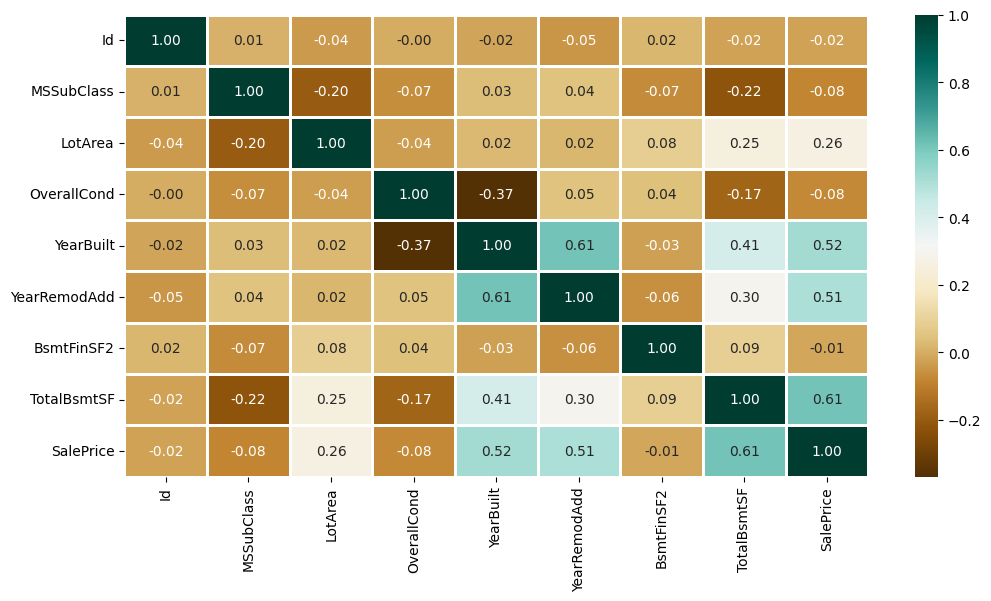

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(numeric_only=True),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<AxesSubplot: title={'center': 'No. of Unique values of Categorical Features'}>

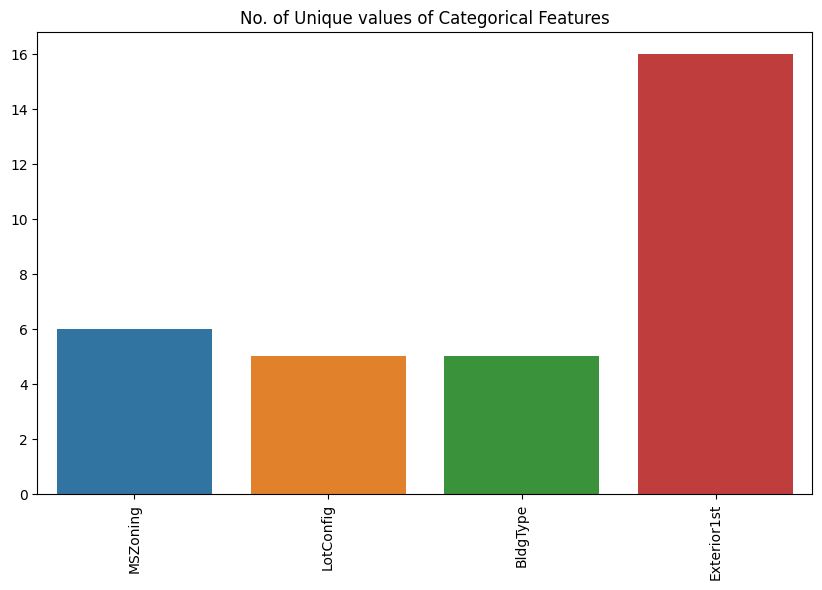

In [5]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. of Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

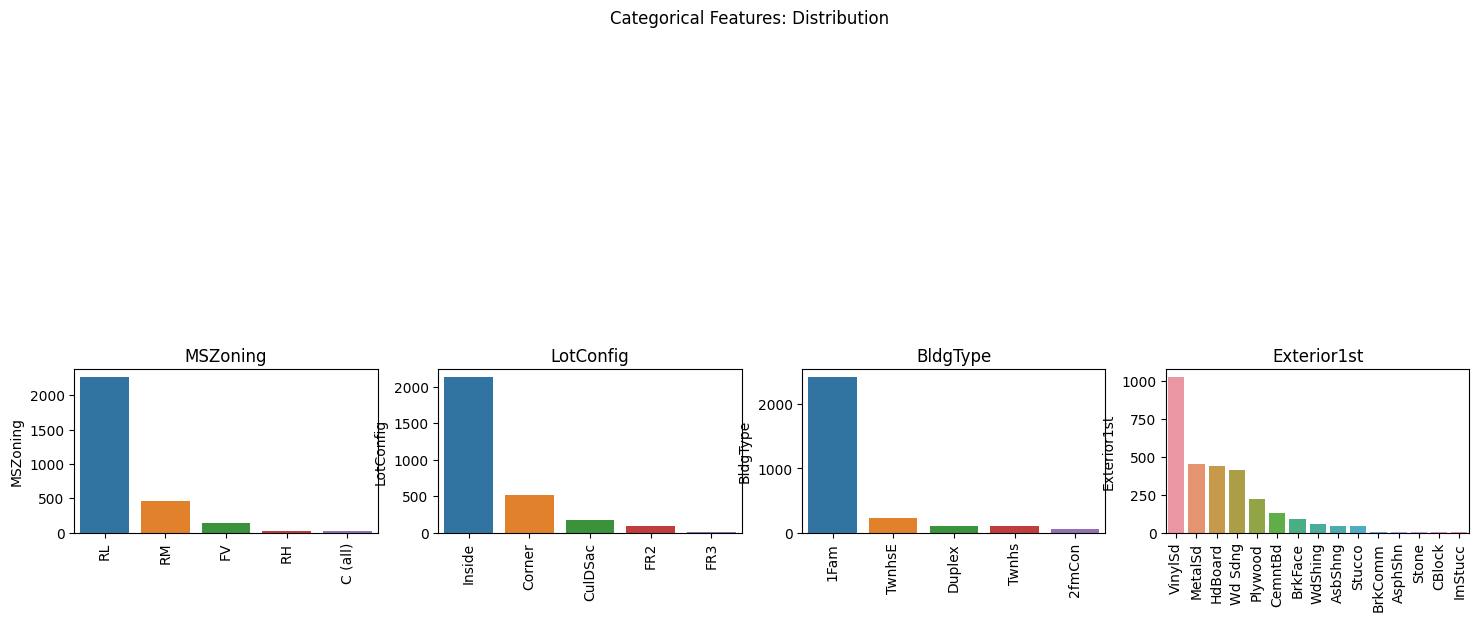

In [6]:
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(18, 36))
fig.suptitle('Categorical Features: Distribution')
 
for ax, col in zip(axes.ravel(), object_cols):
    y = dataset[col].value_counts()
    ax.set_xticks(range(len(y)))
    ax.set_xticklabels(labels=y.index, rotation=90)
    ax.set_title(col)
    sns.barplot(x=y.index, y=y, ax=ax)

for ax in axes.ravel()[len(object_cols):]:
    ax.remove()
    
plt.subplots_adjust(hspace=0.6)
plt.show()

# Data Cleaning

In [7]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [8]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean())

In [9]:
new_dataset = dataset.dropna()

In [10]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

OneHotEncoder – For Label categorical features

In [11]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [12]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.187416838415999


# CatBoost Classifier

In [15]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)
 
cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 163ms	remaining: 2m 43s
1:	learn: 55780.1567575	total: 166ms	remaining: 1m 23s
2:	learn: 55060.9599505	total: 169ms	remaining: 56.1s
3:	learn: 54456.1126921	total: 171ms	remaining: 42.7s
4:	learn: 53901.1464265	total: 173ms	remaining: 34.5s
5:	learn: 53334.6062357	total: 175ms	remaining: 29s
6:	learn: 52824.4943646	total: 177ms	remaining: 25.1s
7:	learn: 52381.4267520	total: 179ms	remaining: 22.1s
8:	learn: 51841.0364316	total: 180ms	remaining: 19.8s
9:	learn: 51281.5852560	total: 182ms	remaining: 18s
10:	learn: 50825.3817438	total: 184ms	remaining: 16.5s
11:	learn: 50477.2609796	total: 185ms	remaining: 15.3s
12:	learn: 50081.4097641	total: 187ms	remaining: 14.2s
13:	learn: 49663.6380360	total: 189ms	remaining: 13.3s
14:	learn: 49334.5782662	total: 191ms	remaining: 12.5s
15:	learn: 48967.5221026	total: 192ms	remaining: 11.8s
16:	learn: 48676.4063222	total: 194ms	remaining: 11.2s
17:	learn: 48359.1169955	total: 196ms	remaining

0.38351169878113034